In [1]:
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt
from idesolver import IDESolver

from volterra import *
from probability import *
from spectral_transforms import *

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=15)
import matplotlib
matplotlib.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

[KeOps] Warning : omp.h header is not in the path, disabling OpenMP. To fix this, you can set the environment
                  variable OMP_PATH to the location of the header before importing keopscore or pykeops,
                  e.g. using os.environ: import os; os.environ['OMP_PATH'] = '/path/to/omp/header'
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


### Laplace Volterra inversion on completely monotonic exponential kernel

In [118]:
c0_re = np.random.randn()
c0_im = 0 #np.random.rand() # Im[c0] >= 0
c0 = c0_re + 1j*c0_im
c1 = np.random.rand() # c1 >= 0

print("c0 = ", c0)
print("c1 = ", c1)

T = 1
Nt = 1000
t = np.linspace(0, T, Nt)
dt = t[1] - t[0]
Nt = len(t)

c0 =  (0.40732001491243364+0j)
c1 =  0.24507704062916458


In [119]:
lmbda_a = np.sort(np.random.rand(10))
lmbda_b = np.random.rand(len(lmbda_a))

lmbda = Distribution(None, lmbda_a, lmbda_b)

K = exp_kernel(lmbda, t)

In [120]:
mu, zeta0, zeta1 = invert_volterra_cm(lmbda, c0, c1)

left and right roots found


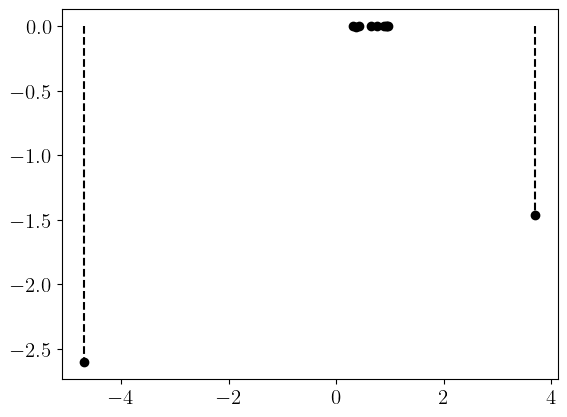

In [ ]:
if mu.density is not None:
    mu_min = -100
    mu_max = 100
    nodes = 10000
    quad_pts, quad_wts = trap_quad(mu_min, mu_max, nodes)
    mu.update_quadrature(quad_pts, quad_wts)

    plt.plot(mu.quad_pts, mu.density_vals)
    plt.show()

plt.plot(mu.atoms, mu.atom_wts, 'o', color="k")
plt.vlines(mu.atoms, ymin=0, ymax=mu.atom_wts, colors='k', linestyles='dashed')
plt.show()

In [122]:
J = exp_kernel(mu, t)

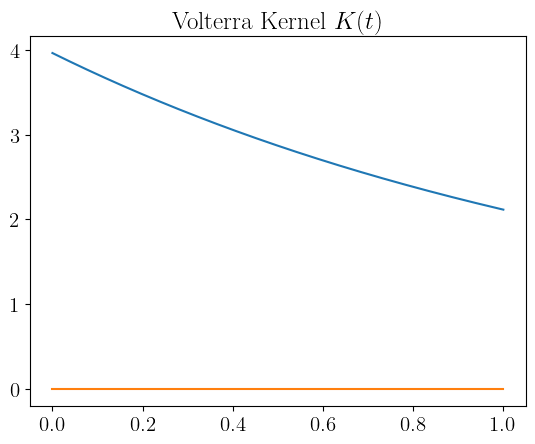

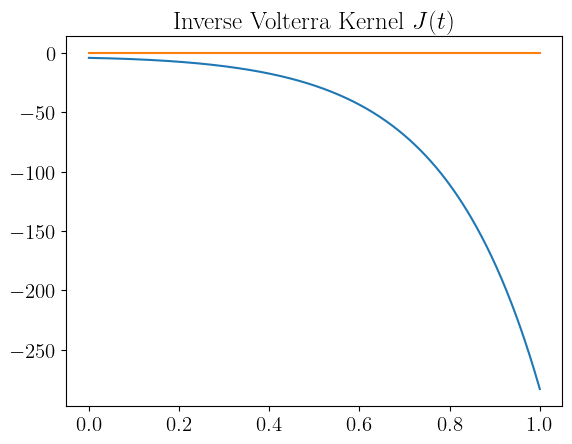

In [123]:
plt.title("Volterra Kernel $K(t)$")
plt.plot(t, np.real(K))
plt.plot(t, np.imag(K))
plt.show()

plt.title("Inverse Volterra Kernel $J(t)$")
plt.plot(t, np.real(J))
plt.plot(t, np.imag(J))
plt.show()

### Perform deconvolution using numerical quadrature

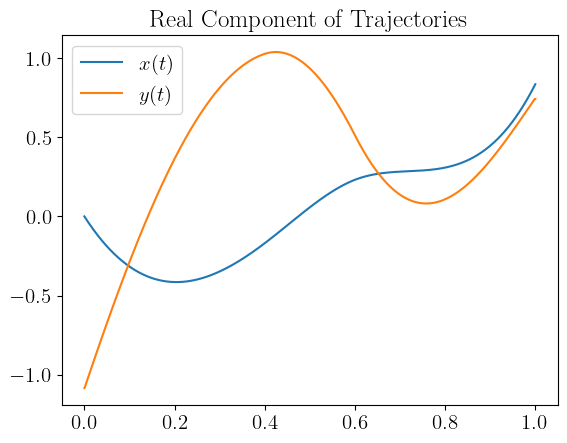

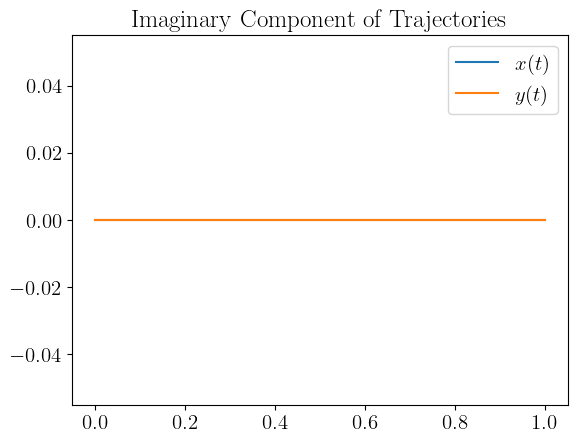

In [124]:
n_interp = 5
interp_xs = np.cumsum(np.insert(np.random.randn(n_interp), 0, 0))/np.sqrt(n_interp)
interp_ts = np.linspace(0, T, n_interp+1)
cs = scipy.interpolate.CubicSpline(interp_ts, interp_xs)
x = cs(t)

xdot = np.gradient(x, dt)
y = c1*xdot - c0*x - conv_trap(K, x, t)

plt.plot(t, np.real(x))
plt.plot(t, np.real(y))
plt.title("Real Component of Trajectories")
plt.legend(["$x(t)$", "$y(t)$"])
plt.show()

plt.plot(t, np.imag(x))
plt.plot(t, np.imag(y))
plt.title("Imaginary Component of Trajectories")
plt.legend(["$x(t)$", "$y(t)$"])
plt.show()

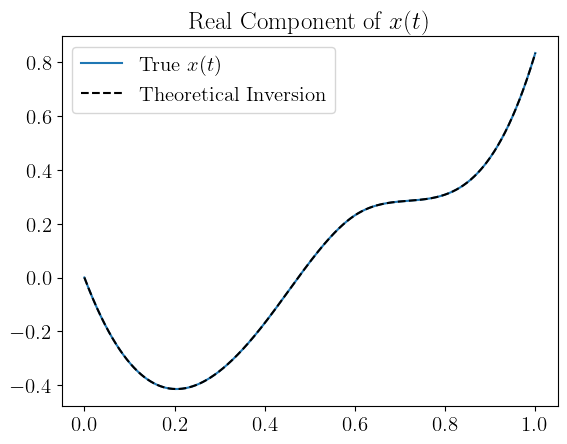

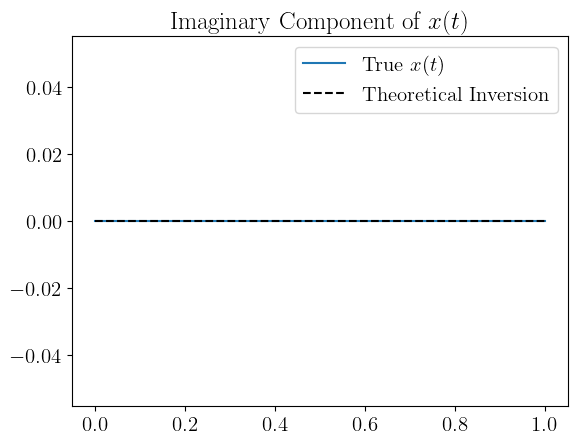

2.5408702068444858e-05


In [125]:
ydot = np.gradient(y, dt)
x_solve = zeta1*ydot - zeta0*y - conv_trap(J, y, t)

plt.plot(t, np.real(x))
plt.plot(t, np.real(x_solve), color="black", linestyle="dashed")
plt.title("Real Component of $x(t)$")
plt.legend(["True $x(t)$", "Theoretical Inversion"])
plt.show()

plt.plot(t, np.imag(x))
plt.plot(t, np.imag(x_solve), color="black", linestyle="dashed")
plt.title("Imaginary Component of $x(t)$")
plt.legend(["True $x(t)$", "Theoretical Inversion"])
plt.show()

print(np.linalg.norm(x - x_solve) / np.linalg.norm(x))

In [45]:
mu_beta/math.pi**2

NameError: name 'mu_beta' is not defined

In [301]:
mu_alpha

array([0.62084713, 1.87915287])

In [302]:
zeta0/math.pi**2

0.33333333333333337

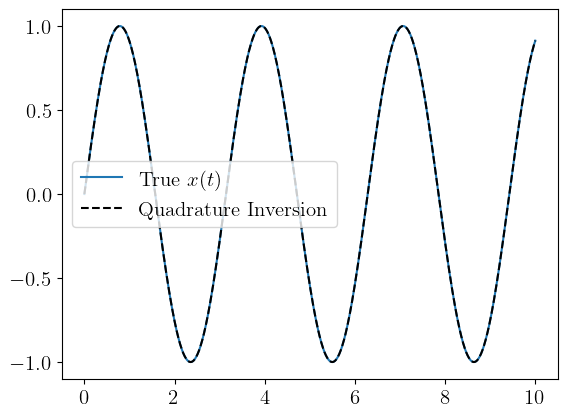

1.8030841126757257e-16


In [304]:
assert(c1 == 0)

x_solve = solve_volterra_second_type(K, c0, y, t)

plt.plot(t, x)
plt.plot(t, x_solve, color="black", linestyle="dashed")
plt.legend(["True $x(t)$", "Quadrature Inversion"])
plt.show()

print(np.linalg.norm(x - x_solve) / np.linalg.norm(x))

In [305]:
assert(c1 != 0)

y_interp = lambda s: np.interp(s, t, y)

solver = IDESolver(
    x = t,
    y_0 = 0,
    c = lambda x, y: c0/c1*y - y_interp(x)/c1,
    d = lambda x: -1/c1,
    k = lambda x, s: np.sum(lmbda_b*np.exp(-lmbda_a*(x-s))),
    f = lambda y: y,
    lower_bound = lambda x: 0,
    upper_bound = lambda x: x,
)

solver.solve()

AssertionError: 

### Future Work: Numerical Algorithm that Searches for Roots in the Complex Plane, generalizes our approach to any linear higher-order integrodifferential Volterra equation

In [466]:
x = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(x, x)

c0 = 0.9 + 0j
c1 = 1 + 0j

num_modes = 100
modes = -np.random.rand(num_modes//2) + 1j*np.random.rand(num_modes//2)
modes = np.concatenate((modes, np.conj(modes)))
weights = np.random.randn(num_modes//2)
weights = np.concatenate((weights, weights))

Z = c1*(X + 1j*Y) + c0 + np.sum(weights[None, None, :]/((X[:, :, None] + np.real(modes[None, None, :])) + 1j*(Y[:, :, None] + np.imag(modes[None, None, :]))), axis=2)

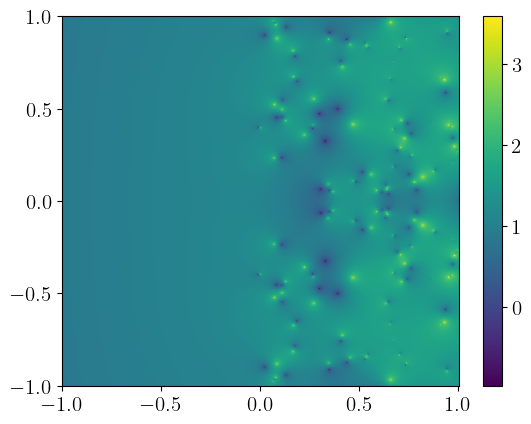

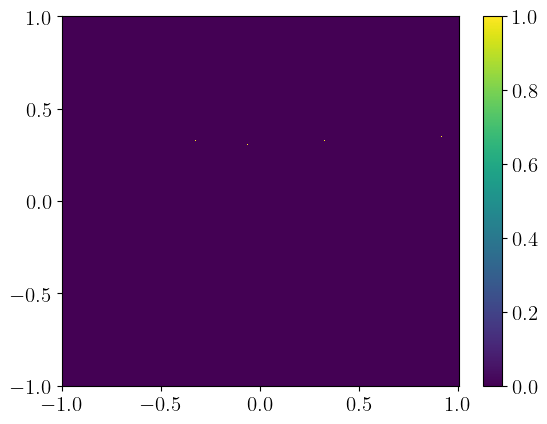

In [468]:
plt.pcolormesh(x, x, np.log10(np.abs(Z)))
plt.colorbar()
plt.show()

plt.pcolormesh(x, x, np.abs(Z).T < 3e-1)
plt.colorbar()
plt.show()

In [457]:
np.conj(1+1j)

(1-1j)